In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import umap
import ast

In [2]:
#Read in data
gp_mean = pd.read_csv("gp_final_data/final_data_mean.csv", index_col=0)
gp_ucb = pd.read_csv("gp_final_data/final_data_ucb.csv", index_col=0)
gp_var = pd.read_csv("gp_final_data/final_data_var.csv", index_col=0)
rand = pd.read_csv("gp_final_data/final_data_random.csv", index_col=0)
data = pd.read_csv("TYK2_fingerprints.csv", index_col=0)

In [30]:
data

,smiles,target,fingerprint
0,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)N)Cl,5.608397,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)NC(=O)C3CC(...,7.972925,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)NC(=O)C3CC(...,6.731267,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)NC(=O)C3CC3...,7.653882,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)NC(=O)C3CC3...,6.562022,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
9992,c1cncnc1Nc2cc(c(cn2)F)NC(=O)c3c(cc(cc3Cl)CF)Cl,7.232871,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9993,c1cncnc1Nc2cc(c(cn2)F)NC(=O)c3c(cc(cc3Cl)CO)Cl,7.230769,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9994,c1cncnc1Nc2cc(c(cn2)F)NC(=O)c3c(cc(cc3Cl)Cl)Cl,7.756025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9995,c1cncnc1Nc2cc(c(cn2)F)NC(=O)c3c(cc(cc3Cl)N)Cl,9.215634,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
lists = [ast.literal_eval(string) for string in data['fingerprint'].values]

In [7]:
#UMAP
embedding = umap.UMAP().fit_transform(lists)

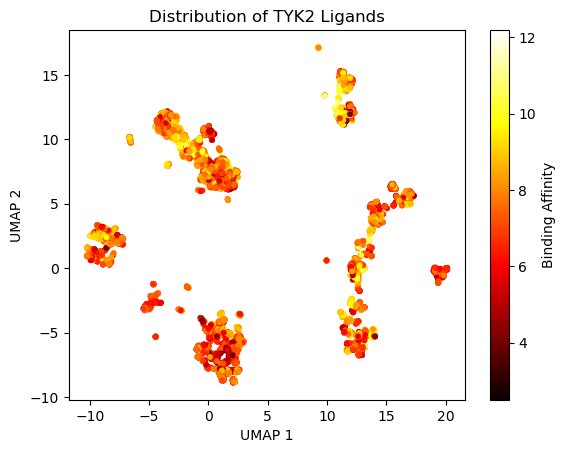

In [11]:
scatter = plt.scatter(embedding[:,0], embedding[:,1], c=data['target'], cmap='hot', s=10)
plt.colorbar(scatter, label='Binding Affinity')
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Distribution of TYK2 Ligands")
plt.show()

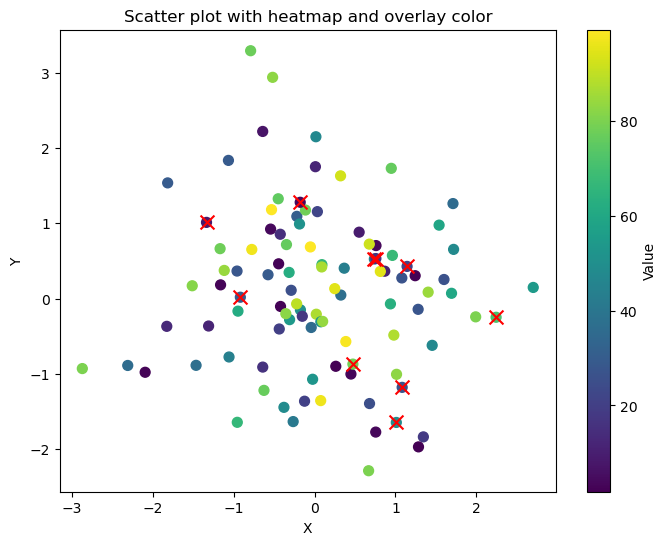

In [22]:
# Example DataFrame
df = pd.DataFrame({
    'x': np.random.randn(100),  # Example x values
    'y': np.random.randn(100),  # Example y values
    'z': np.random.rand(100) * 100,  # Example values for heatmap
    'special_points': [False] * 90 + [True] * 10  # Example special points
})

# Define the colormap
colors = [(0, 'blue'), (0.5, 'green'), (1, 'red')]  # Red to blue heatmap colors
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Scatter plot with heatmap and overlay color for special points
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['x'], df['y'], c=df['z'], cmap="viridis", s=50)  # Heatmap colors
plt.scatter(df[df['special_points']]['x'], df[df['special_points']]['y'], color='red', s=100, marker="x")  # Overlay color
plt.colorbar(scatter, label='Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with heatmap and overlay color')
plt.show()

# Plotting RMSE For GP Model

Text(0, 0.5, 'RMSE')

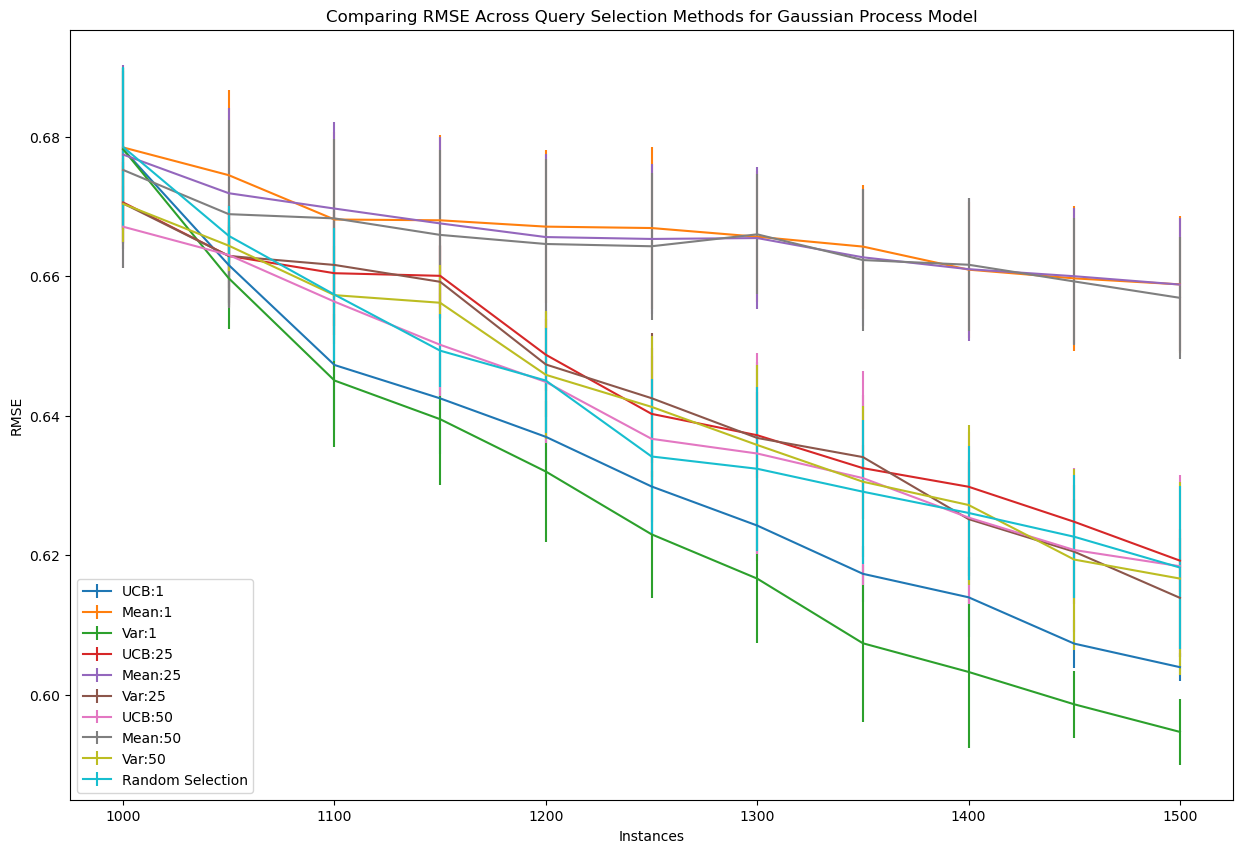

In [3]:
len_data = 0.1*len(data)
plt.figure(figsize=(15,10))

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["1_rmse_mean"],
             yerr = gp_ucb["1_rmse_stdev"],
             label="UCB:1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_mean["1_rmse_mean"],
             yerr = gp_mean["1_rmse_stdev"],
             label="Mean:1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_var["1_rmse_mean"],
             yerr = gp_var["1_rmse_stdev"],
             label = "Var:1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["25_rmse_mean"],
             yerr = gp_ucb["25_rmse_stdev"],
             label="UCB:25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_mean["25_rmse_mean"],
             yerr = gp_mean["25_rmse_stdev"],
             label="Mean:25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_var["25_rmse_mean"],
             yerr = gp_var["25_rmse_stdev"],
             label = "Var:25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["50_rmse_mean"],
             yerr = gp_ucb["50_rmse_stdev"],
             label="UCB:50")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_mean["50_rmse_mean"],
             yerr = gp_mean["50_rmse_stdev"],
             label="Mean:50")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_var["50_rmse_mean"],
             yerr = gp_var["50_rmse_stdev"],
             label = "Var:50")

plt.errorbar(x = range(1000, 1550, 50),
             y = rand["1_rmse_mean"],
             yerr = rand["1_rmse_stdev"],
             label = "Random Selection")

plt.title("Comparing RMSE Across Query Selection Methods for Gaussian Process Model")
plt.legend(loc='lower left')
plt.xlabel("Instances")
plt.ylabel("RMSE")

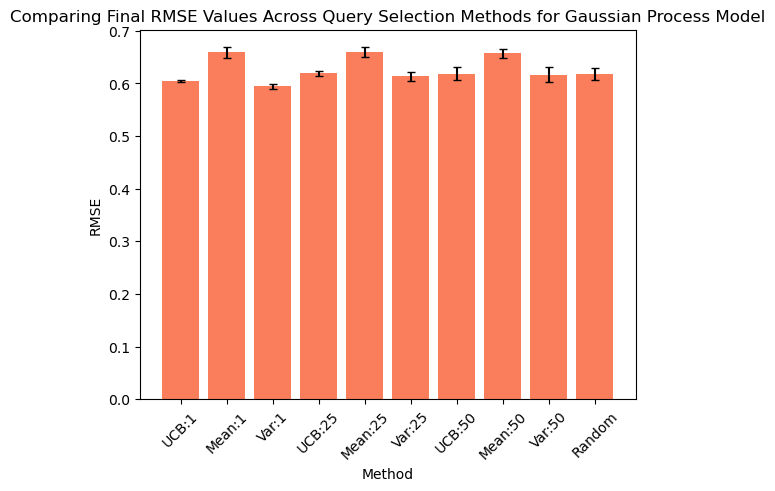

In [4]:
plt.figure()
avgs = [gp_ucb["1_rmse_mean"].iloc[-1], 
        gp_mean["1_rmse_mean"].iloc[-1],
        gp_var["1_rmse_mean"].iloc[-1],
        gp_ucb["25_rmse_mean"].iloc[-1], 
        gp_mean["25_rmse_mean"].iloc[-1],
        gp_var["25_rmse_mean"].iloc[-1],
        gp_ucb["50_rmse_mean"].iloc[-1], 
        gp_mean["50_rmse_mean"].iloc[-1],
        gp_var["50_rmse_mean"].iloc[-1],
        rand["1_rmse_mean"].iloc[-1]]

stds = [gp_ucb["1_rmse_stdev"].iloc[-1], 
        gp_mean["1_rmse_stdev"].iloc[-1],
        gp_var["1_rmse_stdev"].iloc[-1],
        gp_ucb["25_rmse_stdev"].iloc[-1], 
        gp_mean["25_rmse_stdev"].iloc[-1],
        gp_var["25_rmse_stdev"].iloc[-1],
        gp_ucb["50_rmse_stdev"].iloc[-1], 
        gp_mean["50_rmse_stdev"].iloc[-1],
        gp_var["50_rmse_stdev"].iloc[-1],
        rand["1_rmse_stdev"].iloc[-1]]

plt.bar(range(len(avgs)), avgs, yerr = stds, capsize=3, color='#FA7E5B')
plt.xlabel('Method')
plt.ylabel('RMSE')
plt.title('Comparing Final RMSE Values Across Query Selection Methods for Gaussian Process Model')
plt.xticks(range(len(avgs)), ["UCB:1",
                              "Mean:1",
                              "Var:1",
                              "UCB:25",
                              "Mean:25",
                              "Var:25",
                              "UCB:50",
                              "Mean:50",
                              "Var:50",
                              "Random"],
                rotation=45)

plt.show()

# Plotting R^2 for GP Model

Text(0, 0.5, 'R^2')

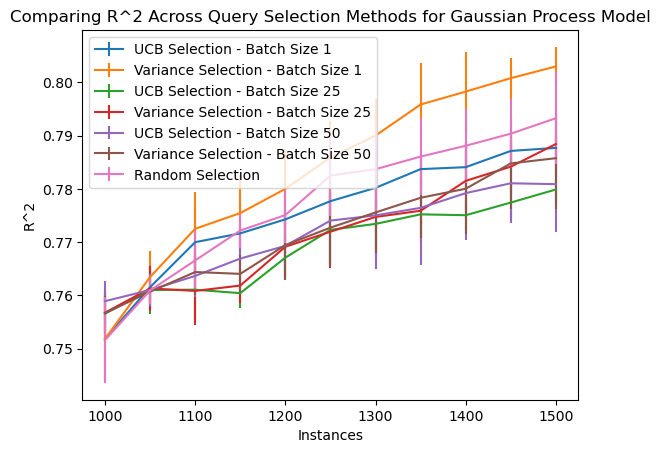

In [22]:
len_data = 0.1*len(data)

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["1_r2_mean"],
             yerr = gp_ucb["1_r2_stdev"],
             label="UCB Selection - Batch Size 1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_var["1_r2_mean"],
             yerr = gp_var["1_r2_stdev"],
             label = "Variance Selection - Batch Size 1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["25_r2_mean"],
             yerr = gp_ucb["25_r2_stdev"],
             label="UCB Selection - Batch Size 25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_var["25_r2_mean"],
             yerr = gp_var["25_r2_stdev"],
             label = "Variance Selection - Batch Size 25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["50_r2_mean"],
             yerr = gp_ucb["50_r2_stdev"],
             label="UCB Selection - Batch Size 50")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_var["50_r2_mean"],
             yerr = gp_var["50_r2_stdev"],
             label = "Variance Selection - Batch Size 50")

plt.errorbar(x = range(1000, 1550, 50),
             y = rand["1_r2_mean"],
             yerr = rand["1_r2_stdev"],
             label = "Random Selection")

plt.title("Comparing R^2 Across Query Selection Methods for Gaussian Process Model")
plt.legend()
plt.xlabel("Instances")
plt.ylabel("R^2")

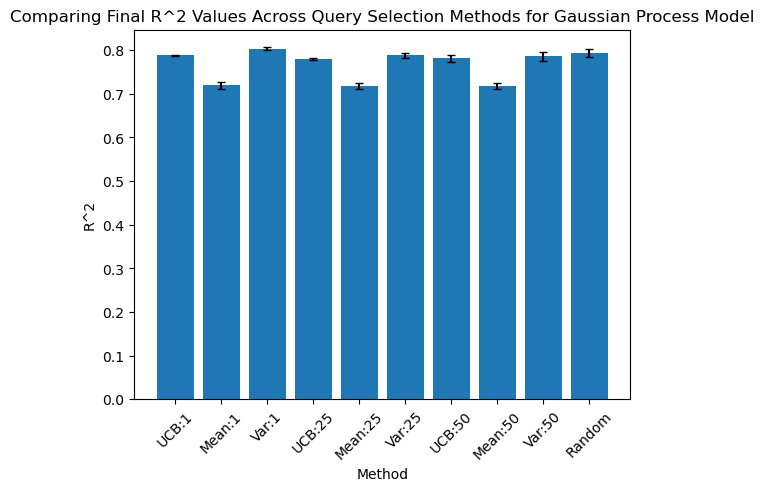

In [23]:
avgs = [gp_ucb["1_r2_mean"].iloc[-1], 
        gp_mean["1_r2_mean"].iloc[-1],
        gp_var["1_r2_mean"].iloc[-1],
        gp_ucb["25_r2_mean"].iloc[-1], 
        gp_mean["25_r2_mean"].iloc[-1],
        gp_var["25_r2_mean"].iloc[-1],
        gp_ucb["50_r2_mean"].iloc[-1], 
        gp_mean["50_r2_mean"].iloc[-1],
        gp_var["50_r2_mean"].iloc[-1],
        rand["1_r2_mean"].iloc[-1]]

stds = [gp_ucb["1_r2_stdev"].iloc[-1], 
        gp_mean["1_r2_stdev"].iloc[-1],
        gp_var["1_r2_stdev"].iloc[-1],
        gp_ucb["25_r2_stdev"].iloc[-1], 
        gp_mean["25_r2_stdev"].iloc[-1],
        gp_var["25_r2_stdev"].iloc[-1],
        gp_ucb["50_r2_stdev"].iloc[-1], 
        gp_mean["50_r2_stdev"].iloc[-1],
        gp_var["50_r2_stdev"].iloc[-1],
        rand["1_r2_stdev"].iloc[-1]]

plt.bar(range(len(avgs)), avgs, yerr = stds, capsize=3)
plt.xlabel('Method')
plt.ylabel('R^2')
plt.title('Comparing Final R^2 Values Across Query Selection Methods for Gaussian Process Model')
plt.xticks(range(len(avgs)), ["UCB:1",
                              "Mean:1",
                              "Var:1",
                              "UCB:25",
                              "Mean:25",
                              "Var:25",
                              "UCB:50",
                              "Mean:50",
                              "Var:50",
                              "Random"],
                rotation=45)

plt.show()